# Capstone 3: Solar Energy Storage Project

# Modeling

## Problem:

Find the best location of the three selected areas in the United States where we can best predict the GHI (Global Horizontal Irradiation), key indicator for energy storage potential, with weather indicators of the past 20 years to be able to install solar panels. These points were selected by the company based on historical average values of GHI, and land availability and cost. The data is provided by NASA of the POWER Project over the past 20 years with an hourly frequency.

## Data:


### About the Power project: 

NASA's goal in Earth science is to observe, understand, and model the Earth system to discover how it is changing, to better predict change, and to understand the consequences for life on Earth. The Applied Sciences Program, within the Science Mission Directorate (which replaced both the Office of Earth Science and the Office of Space Science), serves NASA and Society by expanding and accelerating the realization of societal and economic benefits from Earth science, information, and technology research and development.

The Prediction Of Worldwide Energy Resources (POWER) project was initiated to improve upon the current renewable energy data set and to create new data sets from new satellite systems. The POWER project targets three user communities: (1) Renewable Energy, (2) Sustainable Buildings, and (3) Agroclimatology.


### Locations selected:

Lat/Lat of Selected Locations in US:

South Arizona:        32.7805 / -112.8105

South California:     33.3146 / -115.2055

South New Mexico:     32.3175 / -107.7129      



### Variables included:

ALLSKY_SFC_SW_DWN (GHI): All Sky Surface Shortwave Downward Irradiance
The total solar irradiance incident (direct plus diffuse) on a horizontal plane at the surface of the earth under all sky conditions. An alternative term for the total solar irradiance is the "Global Horizontal Irradiance" or GHI.

CLRSKY_SFC_PAR_TOT: Clear Sky Surface PAR Total
The total Photosynthetically Active Radiation (PAR) incident on a horizontal plane at the surface of the earth under clear sky conditions.

CLRSKY_SFC_SW_DWN: Clear Sky Surface Shortwave Downward Irradiance
The total solar irradiance incident (direct plus diffuse) on a horizontal plane at the surface of the earth under clear sky conditions. An alternative term for the total solar irradiance is the "Global Horizontal Irradiance" or GHI.

WS2M: Wind Speed at 2 Meters
The average of wind speed at 2 meters above the surface of the earth.

T2M: Temperature at 2 Meters
The average air (dry bulb) temperature at 2 meters above the surface of the earth.

T2MDEW: Dew/Frost Point at 2 Meters
The dew/frost point temperature at 2 meters above the surface of the earth.

RH2M: Relative Humidity at 2 Meters
The ratio of actual partial pressure of water vapor to the partial pressure at saturation, expressed in percent.

PRECTOTCORR: Precipitation Corrected
The bias corrected average of total precipitation at the surface of the earth in water mass (includes water content in snow).

PS: Surface Pressure
The average of surface pressure at the surface of the earth.

WS10M: Wind Speed at 10 Meters
The average of wind speed at 10 meters above the surface of the earth.

WS50M: Wind Speed at 50 Meters
The average of wind speed at 50 meters above the surface of the earth.



Link: https://power.larc.nasa.gov/data-access-viewer/

In [3]:
#import pandas, numpy, matlab, seaborn

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')


In [2]:
# Load the data from previous step already splip into training and testing and also a scaler applied to numeric features

# Data for Arizona
X_train_a = pd.read_csv('X_train_a.csv')
X_test_a = pd.read_csv('X_test_a.csv')
y_train_a = pd.read_csv('y_train_a.csv')
y_test_a = pd.read_csv('y_test_a.csv')

# Data for California
X_train_c = pd.read_csv('X_train_c.csv')
X_test_c = pd.read_csv('X_test_c.csv')
y_train_c = pd.read_csv('y_train_c.csv')
y_test_c = pd.read_csv('y_test_c.csv')

# Data for New Mexico
X_train_n = pd.read_csv('X_train_n.csv')
X_test_n = pd.read_csv('X_test_n.csv')
y_train_n = pd.read_csv('y_train_n.csv')
y_test_n = pd.read_csv('y_test_n.csv')



In [3]:
# Take a look at first few rows for Arizona

print(X_train_a.head(5))
print(X_test_a.head(5))
print(y_train_a.head(5))
print(y_test_a.head(5))

       WS2M       T2M    T2MDEW      RH2M  PRECTOTCORR        PS     WS10M  \
0  0.769417 -1.240847  0.855029  3.334305     0.147934  0.034266  0.929356   
1  1.112778  0.391561 -1.541757 -1.267084    -0.145042 -0.478201  1.091120   
2 -0.782858 -1.780805 -0.563552  1.625404    -0.145042  1.012611 -0.526522   
3 -0.482418 -0.117542  0.246889  0.032461    -0.145042  1.268844 -0.780723   
4  1.398911  1.113755 -0.026959 -0.976686    -0.145042 -0.361731  1.374208   

      WS50M  DATE_NUM  PRECTOTCORR_dummy  
0  1.361841 -0.993334           2.859294  
1  0.689793  0.101406          -0.349737  
2 -0.406924  0.597443          -0.349737  
3 -1.054234  0.040347          -0.349737  
4  0.813483  0.623916          -0.349737  
       WS2M       T2M    T2MDEW      RH2M  PRECTOTCORR        PS     WS10M  \
0 -0.353658 -0.929407 -1.890851 -0.929702    -0.145042  0.639908  0.334295   
1 -0.561105 -1.335340 -1.842743 -0.661296    -0.145042 -0.431613 -0.306985   
2  0.075543 -1.438510 -0.231728  1.4789

In [4]:
# Take a look at first few rows for California

print(X_train_c.head(5))
print(X_test_c.head(5))
print(y_train_c.head(5))
print(y_test_c.head(5))

       WS2M       T2M    T2MDEW      RH2M  PRECTOTCORR        PS     WS10M  \
0 -0.496786 -1.590109  0.536313  3.293505    -0.101665 -0.186189 -0.203282   
1  0.973586  0.504452 -1.234265 -1.144029    -0.101665  0.118781  0.925507   
2 -0.648241 -1.789314 -0.425850  1.780886    -0.101665  1.135346 -0.198175   
3  0.891548  0.060591 -0.246064 -0.505087    -0.101665  1.358990  0.787601   
4  1.579405  0.795525 -0.322938 -0.921958    -0.101665 -0.247182  1.569071   

      WS50M  DATE_NUM  PRECTOTCORR_dummy  
0  0.575298 -0.993334          -0.253218  
1  0.541243  0.101406          -0.253218  
2  0.340695  0.597443          -0.253218  
3  0.374750  0.040347          -0.253218  
4  0.972611  0.623916          -0.253218  
       WS2M       T2M    T2MDEW      RH2M  PRECTOTCORR        PS     WS10M  \
0 -0.313779 -1.033106 -1.725266 -0.745664    -0.101665  0.871039  0.215545   
1 -0.534650 -1.324179 -1.472326 -0.346812    -0.101665 -0.491158  0.082746   
2 -0.313779 -1.440221  0.080030  1.9299

In [5]:
# Take a look at first few rows for New Mexico

print(X_train_n.head(5))
print(X_test_n.head(5))
print(y_train_n.head(5))
print(y_test_n.head(5))

       WS2M       T2M    T2MDEW      RH2M  PRECTOTCORR        PS     WS10M  \
0  1.407944 -0.756438  0.782500  2.240582     2.497116 -0.995487  1.517927   
1  1.515004  0.242244 -1.071300 -1.181011    -0.130582 -1.718593  1.444547   
2 -0.572648 -1.861175 -0.757097  1.659840    -0.203574 -0.970553 -0.325207   
3 -0.770707  0.199037 -0.050721 -0.511905    -0.203574  0.650202 -1.041742   
4  0.187471  1.158440  0.361235 -0.879480    -0.203574  0.226312 -0.070535   

      WS50M  DATE_NUM  PRECTOTCORR_dummy  
0  1.734242 -0.993334           2.090974  
1  0.960689  0.101406           2.090974  
2  0.170537  0.597443          -0.478246  
3 -1.323448  0.040347          -0.478246  
4 -0.490136  0.623916          -0.478246  
       WS2M       T2M    T2MDEW      RH2M  PRECTOTCORR        PS     WS10M  \
0 -0.519119 -1.334829 -1.601955 -0.597536    -0.203574  1.024222 -0.048953   
1 -0.701119 -1.229756 -1.487911 -0.580228    -0.203574 -1.194965 -0.342473   
2  1.183120 -0.445148  0.027248  0.2678

In [6]:
# Take a look at the shapes for Arizona
print(X_train_a.shape)
print(X_test_a.shape)
print(y_train_a.shape)
print(y_test_a.shape)


(120154, 10)
(51495, 10)
(120154, 1)
(51495, 1)


In [7]:
# Take a look at the shapes for California
print(X_train_c.shape)
print(X_test_c.shape)
print(y_train_c.shape)
print(y_test_c.shape)


(120154, 10)
(51495, 10)
(120154, 1)
(51495, 1)


In [8]:
# Take a look at the shapes for New Mexico
print(X_train_n.shape)
print(X_test_n.shape)
print(y_train_n.shape)
print(y_test_n.shape)


(120154, 10)
(51495, 10)
(120154, 1)
(51495, 1)


## Create and train a Neural Network model with Keras for the Arizona location

### 2 layers

In [9]:
# import sys
# print(sys.executable)

In [10]:
# Used this code to reinstall tensorflow that was giving me errors and python didn't find tensorflow

#!/Users/claudiazaffaroni/anaconda3/envs/myenv/bin/python -m pip install --upgrade --force-reinstall tensorflow
#!/Users/claudiazaffaroni/anaconda3/envs/myenv/bin/python -m pip install --upgrade tables blosc2

#! /Users/claudiazaffaroni/anaconda3/envs/myenv/bin/python -m pip install tensorflow==2.13.0

In [11]:
#import tensorflow as tf
#print(tf.__version__)

In [12]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


import matplotlib.pyplot as plt
%matplotlib inline


In [13]:
# Create a sequential model

model_a1 = Sequential()

In [14]:
## try a 2 layer model first 

num_features = 10 # number of features / columns including the date column converted to Unix timestamp

# Add the first layer (input layer): input layer 
model_a1.add(Dense(units=64, activation='relu', input_dim=num_features))

# Add the third layer (output layer): output layer 
model_a1.add(Dense(units=1, activation='linear'))  

### Different scenarios tested of 2 layer model with key results:


###  options I tested:

units=64,units=1 
epochs=20

r2 =  0.70
Train MSE = 31746.03 
Test MSE = 31921.26
RMSE = 178.67

units=64,units=1 
epochs=30

Train MSE for Arizona (2 layers) :  31507.96
Test MSE for Arizona (2 layers) :  31709.22
Root Mean Squared Error (RMSE) for Arizona (2 layers): 178.07
r2 score or Arizona (2 layers):  0.7

units=64,units=1 
epochs=40

Train MSE for Arizona (2 layers) :  31281.98
Test MSE for Arizona (2 layers) :  31476.45
Root Mean Squared Error (RMSE) for Arizona (2 layers): 177.42
r2 score or Arizona (2 layers):  0.7

units=64,units=1 
epochs=50

Train MSE for Arizona (2 layers) :  31182.34
Test MSE for Arizona (2 layers) :  31414.75
Root Mean Squared Error (RMSE) for Arizona (2 layers): 177.24
r2 score or Arizona (2 layers):  0.7

units=64,units=1 
epochs=100

Train MSE for Arizona (2 layers) :  30890.96
Test MSE for Arizona (2 layers) :  31110.07
Root Mean Squared Error (RMSE) for Arizona (2 layers): 176.38
r2 score or Arizona (2 layers):  0.7




units=32,units=1 
epochs=10

Train MSE for Arizona (2 layers) :  173544.64
Test MSE for Arizona (2 layers) :  171977.2
Root Mean Squared Error (RMSE) for Arizona (2 layers): 414.7
r2 score or Arizona (2 layers):  -0.64


units=48,units=1 
epochs=10

Train MSE for Arizona (2 layers) :  200224.94
Test MSE for Arizona (2 layers) :  200711.66
Root Mean Squared Error (RMSE) for Arizona (2 layers): 448.01
r2 score or Arizona (2 layers):  -0.92


units=48,units=1 
epochs=20

Train MSE for Arizona (2 layers) :  2686438.0
Test MSE for Arizona (2 layers) :  2691363.75
Root Mean Squared Error (RMSE) for Arizona (2 layers): 1640.54
r2 score or Arizona (2 layers):  -24.68


units=76,units=1 
epochs=20

Train MSE for Arizona (2 layers) :  12026980.0
Test MSE for Arizona (2 layers) :  12031217.0
Root Mean Squared Error (RMSE) for Arizona (2 layers): 3468.6
r2 score or Arizona (2 layers):  -113.8


units=52,units=1 
epochs=20

Train MSE for Arizona (2 layers) :  158148.64
Test MSE for Arizona (2 layers) :  157389.67
Root Mean Squared Error (RMSE) for Arizona (2 layers): 396.72
r2 score or Arizona (2 layers):  -0.5


### BEST ONE:

units=64,units=1 
epochs=10

Train MSE for Arizona (2 layers) :  31766.3
Test MSE for Arizona (2 layers) :  31935.11
Root Mean Squared Error (RMSE) for Arizona (2 layers): 178.7
r2 score or Arizona (2 layers):  0.7






In [15]:
# Compile the model: Choose an optimizer, loss function, and metrics

model_a1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


In [28]:
# Train the Model 

history_a1 = model_a1.fit(X_train_a, y_train_a, epochs=10, batch_size=256, validation_data=(X_test_a, y_test_a))



Epoch 1/10
470/470 [==============================] - 2s 5ms/step - loss: 32257.1465 - mse: 32257.1465 - val_loss: 32339.0312 - val_mse: 32339.0312
Epoch 2/10
470/470 [==============================] - 2s 5ms/step - loss: 32178.1621 - mse: 32178.1621 - val_loss: 32298.6250 - val_mse: 32298.6250
Epoch 3/10
470/470 [==============================] - 3s 5ms/step - loss: 32116.6152 - mse: 32116.6152 - val_loss: 32244.1289 - val_mse: 32244.1289
Epoch 4/10
470/470 [==============================] - 2s 5ms/step - loss: 32056.2402 - mse: 32056.2402 - val_loss: 32166.8906 - val_mse: 32166.8906
Epoch 5/10
470/470 [==============================] - 2s 5ms/step - loss: 32006.4863 - mse: 32006.4863 - val_loss: 32111.3379 - val_mse: 32111.3379
Epoch 6/10
470/470 [==============================] - 3s 6ms/step - loss: 31948.9004 - mse: 31948.9004 - val_loss: 32055.7480 - val_mse: 32055.7480
Epoch 7/10
470/470 [==============================] - 2s 5ms/step - loss: 31909.8125 - mse: 31909.8125 - val_los

In [29]:
# print(history_a1.history.keys())

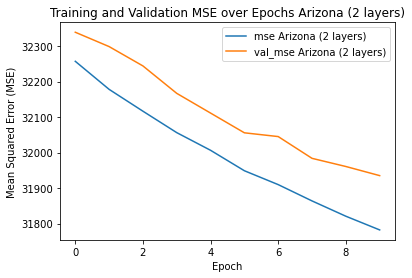

In [30]:
# plot the mse and validation mse of the dataset
plt.plot(history_a1.history['mse'], label='mse Arizona (2 layers)')
plt.plot(history_a1.history['val_mse'], label='val_mse Arizona (2 layers)')

# Set plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation MSE over Epochs Arizona (2 layers)')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

scores_a1_train = model_a1.evaluate(X_train_a, y_train_a, verbose = 0)
scores_a1 = model_a1.evaluate(X_test_a, y_test_a, verbose = 0)

# Make predictions on the test set
y_pred_a1 = model_a1.predict(X_test_a).flatten()

# Evaluate the model using mean squared error
mse_a1 = mean_squared_error(y_test_a, y_pred_a1)
rmse_a1 = round(np.sqrt(mse_a1),2)


print('Train MSE for Arizona (2 layers) : ', round(scores_a1_train[1],2))
print('Test MSE for Arizona (2 layers) : ', round(scores_a1[1],2))

print(f"Root Mean Squared Error (RMSE) for Arizona (2 layers): {rmse_a1}")
print('r2 score or Arizona (2 layers): ', round(r2_score(y_test_a, y_pred_a1),2))


1610/1610 [==============================] - 2s 1ms/step
Train MSE for Arizona (2 layers) :  31766.3
Test MSE for Arizona (2 layers) :  31935.11
Root Mean Squared Error (RMSE) for Arizona (2 layers): 178.7
r2 score or Arizona (2 layers):  0.7


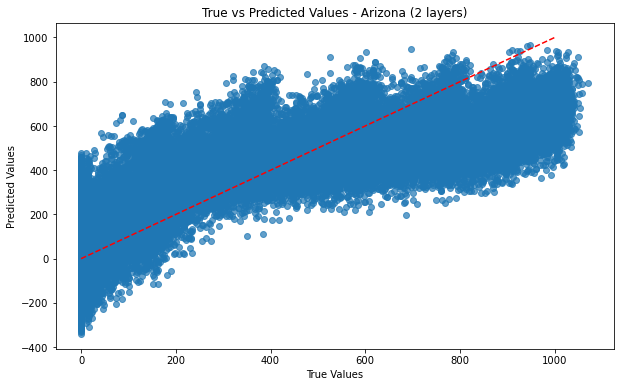

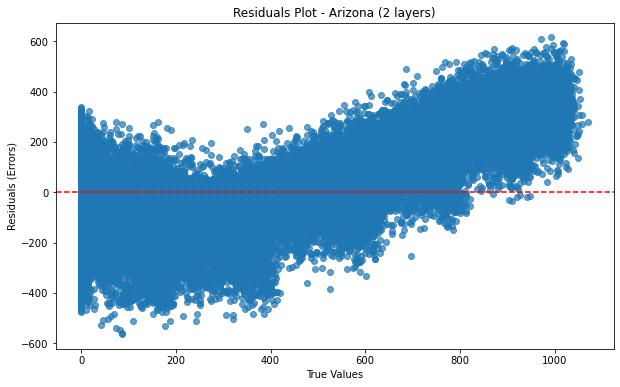

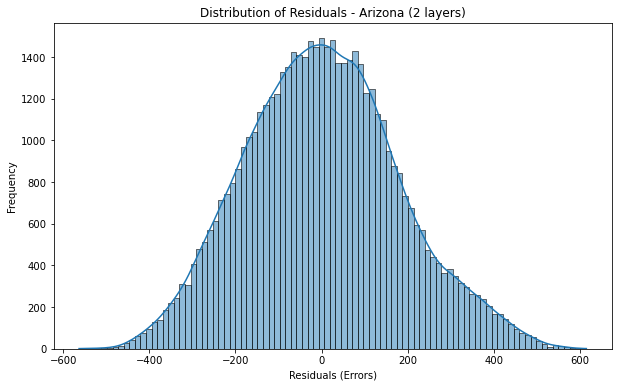

In [32]:

# Scatter plot of true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_a, y_pred_a1, alpha=0.7)
plt.title('True vs Predicted Values - Arizona (2 layers)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
x = np.linspace(0,1000,10000)
y = x
plt.plot(x, y, color='r', linestyle='--')  # Add a diagonal line at y=x for reference
plt.show()

# Plotting the residuals (errors)
residuals_a1 = y_test_a['ALLSKY_SFC_SW_DWN'].values - y_pred_a1

plt.figure(figsize=(10, 6))
plt.scatter(y_test_a, residuals_a1, alpha=0.7)
plt.title('Residuals Plot - Arizona (2 layers)')
plt.xlabel('True Values')
plt.ylabel('Residuals (Errors)')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

# Distribution of errors
plt.figure(figsize=(10, 6))
sns.histplot(residuals_a1, kde=True)
plt.title('Distribution of Residuals - Arizona (2 layers)')
plt.xlabel('Residuals (Errors)')
plt.ylabel('Frequency')
plt.show()


In [33]:
def plotPredictions(X, y, y_pred, start=0, end=1000):
    y_pred = np.hstack(y_pred)
    plt.plot(y[start:end], label='Actual')
    plt.plot(y_pred[start:end], label='Predicted')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('GHI')
    plt.title('Actual vs Predicted GHI - Arizona (2 layers)')
    print(f'MSE {mean_squared_error(y, y_pred):.2f}')
    print(f'R2 {r2_score(y, y_pred):.2f}') 
    
# See if I can change when the graph starts for y_pred, try changing np.hstack(y_pred) !!!!!!!!!!!!!!
    

In [34]:
round(r2_score(y_test_a, y_pred_a1),2)

0.7

MSE 31935.17
R2 0.70


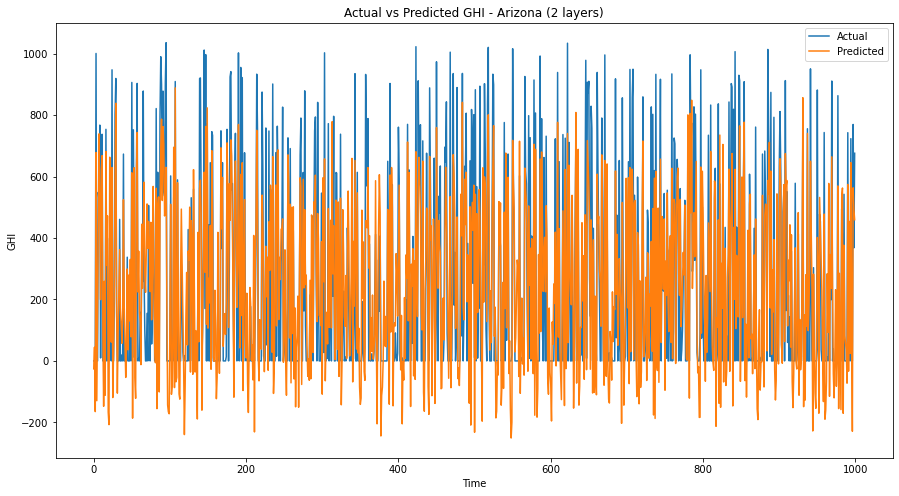

In [35]:
plt.figure(figsize=(15,8))
plotPredictions(X_test_a, y_test_a, y_pred_a1, start=0, end=1000)

### 3 layers

In [91]:
# Create a sequential model

model_a2 = Sequential()

In [92]:
# add layer to the model

num_features = 10 # number of features / columns including the date column converted to Unix timestamp

# Add the first layer (input layer): input layer 
model_a2.add(Dense(units=64, activation='relu', input_dim=num_features))

# Add the second layer (hidden layer): hidden layer 
model_a2.add(Dense(units=4, activation='relu'))

# Add the third layer (output layer): output layer 
model_a2.add(Dense(units=1, activation='linear'))  



### Different scenarios tested:


Units=64, 4, 1 & epochs=5

Train Mean Squared Error for Arizona (3 layers) :  36564.53
Mean Squared Error for Arizona (3 layers) :  36931.81
Root Mean Squared Error (RMSE) for Arizona model (3 layers): 192.18
r2 score or Arizona (3 layers):  0.65

Units=64, 4, 1 & epochs=10

Train Mean Squared Error for Arizona (3 layers) :  36541.48
Mean Squared Error for Arizona (3 layers) :  36905.0
Root Mean Squared Error (RMSE) for Arizona model (3 layers): 192.11
r2 score or Arizona (3 layers):  0.65

Units=64, 2, 1 & epochs=10

Train Mean Squared Error for Arizona (3 layers) :  145606.3
Mean Squared Error for Arizona (3 layers) :  145390.91
Root Mean Squared Error (RMSE) for Arizona model (3 layers): 381.3
r2 score or Arizona (3 layers):  -0.39

Units=64, 2, 1 & epochs=20

Train Mean Squared Error for Arizona (3 layers) :  106940.35
Mean Squared Error for Arizona (3 layers) :  106574.59
Root Mean Squared Error (RMSE) for Arizona model (3 layers): 326.46
r2 score or Arizona (3 layers):  -0.02


### Best One: 

Units=64, 4, 1 & epochs=20

Train Mean Squared Error for Arizona (3 layers) :  32673.16
Mean Squared Error for Arizona (3 layers) :  32921.79
Root Mean Squared Error (RMSE) for Arizona model (3 layers): 181.44
r2 score or Arizona (3 layers):  0.69




In [93]:
# Compile the model: Choose an optimizer, loss function, and metrics


model_a2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


In [98]:
# Train the Model 

history_a2 = model_a2.fit(X_train_a, y_train_a, epochs=20, batch_size=256, validation_data=(X_test_a, y_test_a))



Epoch 1/20
470/470 [==============================] - 3s 6ms/step - loss: 70618.0703 - mse: 70618.0703 - val_loss: 36259.4219 - val_mse: 36259.4219
Epoch 2/20
470/470 [==============================] - 3s 6ms/step - loss: 32931.7148 - mse: 32931.7148 - val_loss: 32110.4961 - val_mse: 32110.4961
Epoch 3/20
470/470 [==============================] - 3s 6ms/step - loss: 31559.0137 - mse: 31559.0137 - val_loss: 31286.2676 - val_mse: 31286.2676
Epoch 4/20
470/470 [==============================] - 3s 6ms/step - loss: 31153.1738 - mse: 31153.1738 - val_loss: 31188.7422 - val_mse: 31188.7422
Epoch 5/20
470/470 [==============================] - 3s 6ms/step - loss: 31103.0000 - mse: 31103.0000 - val_loss: 31222.4922 - val_mse: 31222.4922
Epoch 6/20
470/470 [==============================] - 3s 6ms/step - loss: 31155.1172 - mse: 31155.1172 - val_loss: 31215.0234 - val_mse: 31215.0234
Epoch 7/20
470/470 [==============================] - 3s 6ms/step - loss: 31145.0332 - mse: 31145.0332 - val_los

In [99]:
# print(history_a2.history.keys())

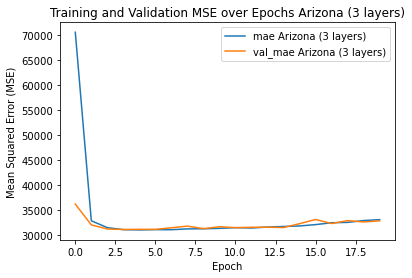

In [100]:
#plot the mse and validation mse of the dataset
plt.plot(history_a2.history['mse'], label='mae Arizona (3 layers)')
plt.plot(history_a2.history['val_mse'], label='val_mae Arizona (3 layers)')

# Set plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation MSE over Epochs Arizona (3 layers)')

plt.legend()

# Show the plot
plt.show()


In [101]:
scores_a2_train = model_a2.evaluate(X_train_a, y_train_a, verbose = 0)
scores_a2 = model_a2.evaluate(X_test_a, y_test_a, verbose = 0)

# Make predictions on the test set
y_pred_a2 = model_a2.predict(X_test_a).flatten()

# Evaluate the model using mean squared error
mse_a2 = mean_squared_error(y_test_a, y_pred_a2)
rmse_a2 = round(np.sqrt(mse_a2),2)

print('Train Mean Squared Error for Arizona (3 layers) : ', round(scores_a2_train[1],2))
print('Mean Squared Error for Arizona (3 layers) : ', round(scores_a2[1],2))

print(f"Root Mean Squared Error (RMSE) for Arizona model (3 layers): {rmse_a2}")
print('r2 score or Arizona (3 layers): ', round(r2_score(y_test_a, y_pred_a2),2))

1610/1610 [==============================] - 2s 1ms/step
Train Mean Squared Error for Arizona (3 layers) :  32673.16
Mean Squared Error for Arizona (3 layers) :  32921.79
Root Mean Squared Error (RMSE) for Arizona model (3 layers): 181.44
r2 score or Arizona (3 layers):  0.69


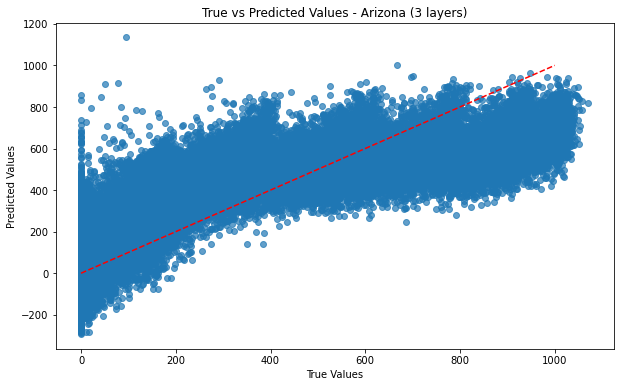

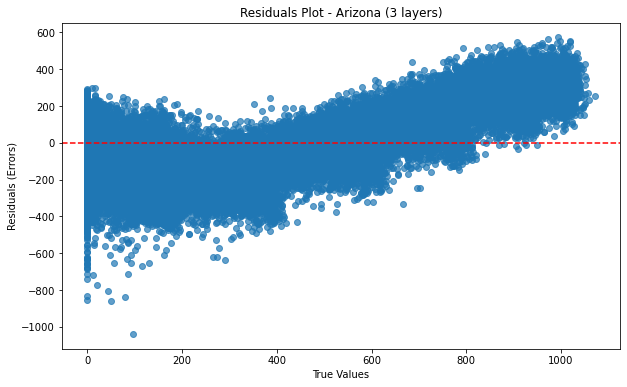

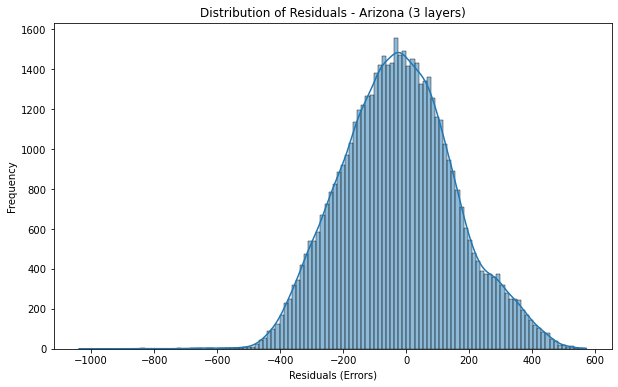

In [105]:

# Scatter plot of true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_a, y_pred_a2, alpha=0.7)
plt.title('True vs Predicted Values - Arizona (3 layers)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
x = np.linspace(0,1000,10000)
y = x
plt.plot(x, y, color='r', linestyle='--')  # Add a diagonal line at y=x for reference
plt.show()

# Plotting the residuals (errors)
residuals_a2 = y_test_a['ALLSKY_SFC_SW_DWN'].values - y_pred_a2

plt.figure(figsize=(10, 6))
plt.scatter(y_test_a, residuals_a2, alpha=0.7)
plt.title('Residuals Plot - Arizona (3 layers)')
plt.xlabel('True Values')
plt.ylabel('Residuals (Errors)')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

# Distribution of errors
plt.figure(figsize=(10, 6))
sns.histplot(residuals_a2, kde=True)
plt.title('Distribution of Residuals - Arizona (3 layers)')
plt.xlabel('Residuals (Errors)')
plt.ylabel('Frequency')
plt.show()

In [108]:
round(r2_score(y_test_a, y_pred_a2),2)


0.69

MSE 32921.79
R2 0.69


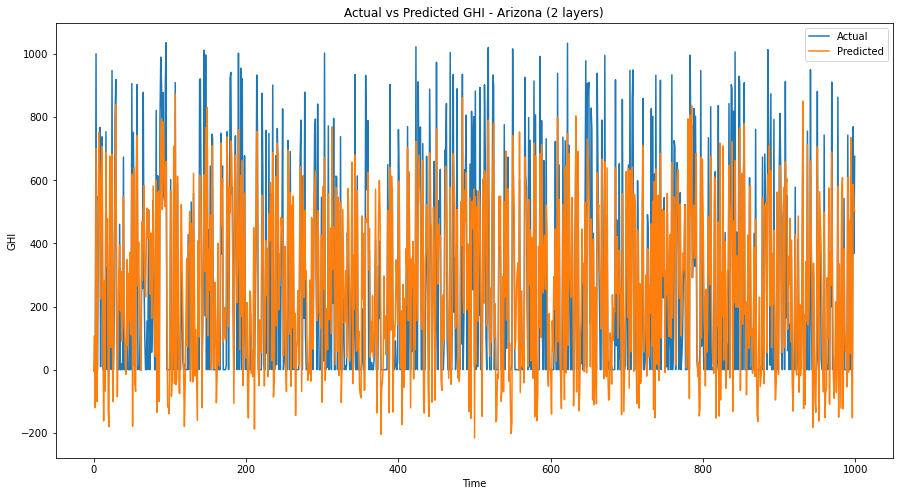

In [107]:
plt.figure(figsize=(15,8))
plotPredictions(X_test_a, y_test_a, y_pred_a2, start=0, end=1000)

## Create and train a Neural Network model with Keras for the California location

### 2 layers

In [242]:
# Create a sequential model

model_c1 = Sequential()

In [243]:
## try a 2 layer model first 

num_features = 10 # number of features / columns including the date column converted to Unix timestamp

# Add the first layer (input layer): input layer 
model_c1.add(Dense(units=64, activation='relu', input_dim=num_features))

# Add the third layer (output layer): output layer 
model_c1.add(Dense(units=1, activation='linear'))  

### Different scenarios tested of 2 layer model with key results:


###  options I tested:

units=64,units=1 
epochs=10

Train MSE for California (2 layers) :  34335.82
Test MSE for California (2 layers) :  34516.32
Root Mean Squared Error (RMSE) for California (2 layers): 185.79
r2 score or California (2 layers):  0.67

units=64,units=1 
epochs=20

Train MSE for California (2 layers) :  31634.36
Test MSE for California (2 layers) :  31814.77
Root Mean Squared Error (RMSE) for California (2 layers): 178.37
r2 score or California (2 layers):  0.7


units=64,units=1 
epochs=50

Train MSE for California (2 layers) :  30284.12
Test MSE for California (2 layers) :  30469.31
Root Mean Squared Error (RMSE) for California (2 layers): 174.55
r2 score or California (2 layers):  0.71


units=32,units=1 
epochs=10

Train MSE for California (2 layers) :  94756.12
Test MSE for California (2 layers) :  94673.91
Root Mean Squared Error (RMSE) for California (2 layers): 307.69
r2 score or California (2 layers):  0.1


units=48,units=1 
epochs=10

Train MSE for California (2 layers) :  756413.88
Test MSE for California (2 layers) :  751864.88
Root Mean Squared Error (RMSE) for California (2 layers): 867.1
r2 score or California (2 layers):  -6.17

units=48,units=1 
epochs=20

Train MSE for California (2 layers) :  2955789.5
Test MSE for California (2 layers) :  2936882.75
Root Mean Squared Error (RMSE) for California (2 layers): 1713.73
r2 score or California (2 layers):  -26.99

units=76,units=1 
epochs=20

Train MSE for California (2 layers) :  193118.8
Test MSE for California (2 layers) :  192234.62
Root Mean Squared Error (RMSE) for California (2 layers): 438.45
r2 score or California (2 layers):  -0.83

units=52,units=1 
epochs=20

Train MSE for California (2 layers) :  92807640.0
Test MSE for California (2 layers) :  92259592.0
Root Mean Squared Error (RMSE) for California (2 layers): 9605.19
r2 score or California (2 layers):  -878.34


### BEST ONE:

units=64,units=1 
epochs=30

Train MSE for California (2 layers) :  30612.33
Test MSE for California (2 layers) :  30797.69
Root Mean Squared Error (RMSE) for California (2 layers): 175.49
r2 score or California (2 layers):  0.71


In [244]:
# Compile the model: Choose an optimizer, loss function, and metrics

model_c1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


In [258]:
# Train the Model 

history_c1 = model_c1.fit(X_train_c, y_train_c, epochs=30, batch_size=1000, validation_data=(X_test_c, y_test_c))



Epoch 1/30
121/121 [==============================] - 1s 6ms/step - loss: 30831.7480 - mse: 30831.7480 - val_loss: 31007.3516 - val_mse: 31007.3516
Epoch 2/30
121/121 [==============================] - 1s 5ms/step - loss: 30820.5957 - mse: 30820.5957 - val_loss: 30997.4336 - val_mse: 30997.4336
Epoch 3/30
121/121 [==============================] - 1s 5ms/step - loss: 30809.7344 - mse: 30809.7344 - val_loss: 30985.8730 - val_mse: 30985.8730
Epoch 4/30
121/121 [==============================] - 1s 5ms/step - loss: 30801.2441 - mse: 30801.2441 - val_loss: 30977.3516 - val_mse: 30977.3516
Epoch 5/30
121/121 [==============================] - 1s 5ms/step - loss: 30787.3750 - mse: 30787.3750 - val_loss: 30974.4609 - val_mse: 30974.4609
Epoch 6/30
121/121 [==============================] - 1s 5ms/step - loss: 30781.4766 - mse: 30781.4766 - val_loss: 30966.7168 - val_mse: 30966.7168
Epoch 7/30
121/121 [==============================] - 1s 5ms/step - loss: 30773.0586 - mse: 30773.0586 - val_los

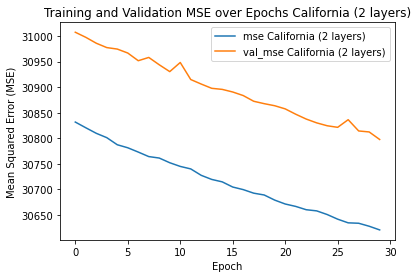

In [259]:
# plot the mse and validation mse of the dataset
plt.plot(history_c1.history['mse'], label='mse California (2 layers)')
plt.plot(history_c1.history['val_mse'], label='val_mse California (2 layers)')

# Set plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation MSE over Epochs California (2 layers)')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [260]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

scores_c1_train = model_c1.evaluate(X_train_c, y_train_c, verbose = 0)
scores_c1 = model_c1.evaluate(X_test_c, y_test_c, verbose = 0)

# Make predictions on the test set
y_pred_c1 = model_c1.predict(X_test_c).flatten()

# Evaluate the model using mean squared error
mse_c1 = mean_squared_error(y_test_c, y_pred_c1)
rmse_c1 = round(np.sqrt(mse_c1),2)


print('Train MSE for California (2 layers) : ', round(scores_c1_train[1],2))
print('Test MSE for California (2 layers) : ', round(scores_c1[1],2))

print(f"Root Mean Squared Error (RMSE) for California (2 layers): {rmse_c1}")
print('r2 score or California (2 layers): ', round(r2_score(y_test_c, y_pred_c1),2))


1610/1610 [==============================] - 2s 1ms/step
Train MSE for California (2 layers) :  30612.33
Test MSE for California (2 layers) :  30797.69
Root Mean Squared Error (RMSE) for California (2 layers): 175.49
r2 score or California (2 layers):  0.71


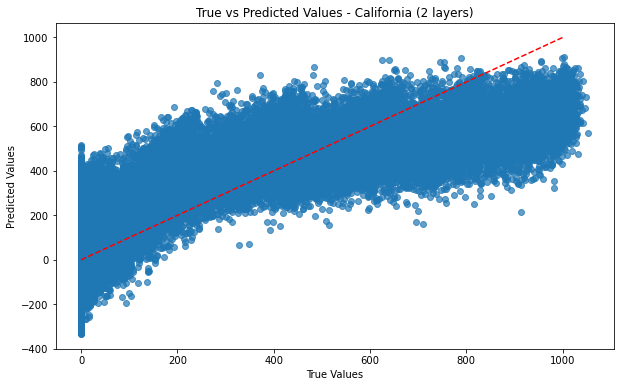

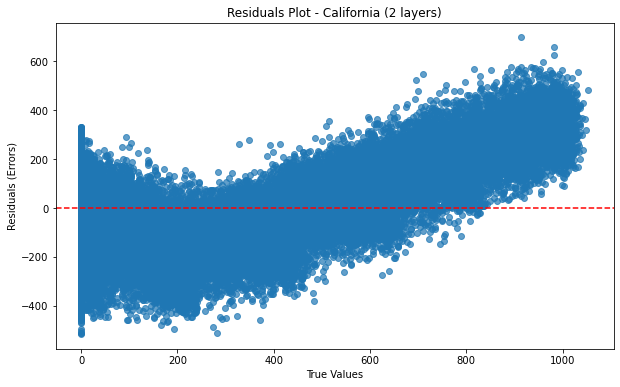

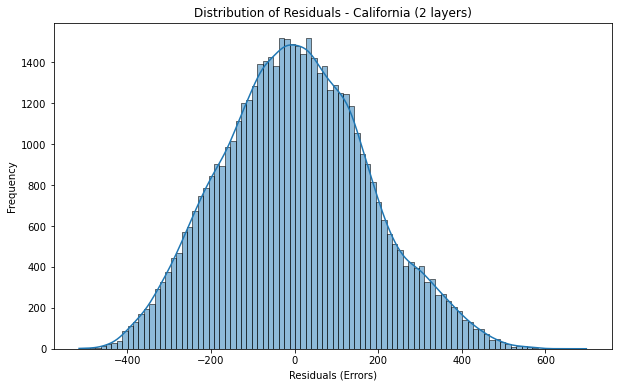

In [261]:

# Scatter plot of true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_c, y_pred_c1, alpha=0.7)
plt.title('True vs Predicted Values - California (2 layers)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
x = np.linspace(0,1000,10000)
y = x
plt.plot(x, y, color='r', linestyle='--')  # Add a diagonal line at y=x for reference
plt.show()

# Plotting the residuals (errors)
residuals_c1 = y_test_c['ALLSKY_SFC_SW_DWN'].values - y_pred_c1

plt.figure(figsize=(10, 6))
plt.scatter(y_test_c, residuals_c1, alpha=0.7)
plt.title('Residuals Plot - California (2 layers)')
plt.xlabel('True Values')
plt.ylabel('Residuals (Errors)')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

# Distribution of errors
plt.figure(figsize=(10, 6))
sns.histplot(residuals_c1, kde=True)
plt.title('Distribution of Residuals - California (2 layers)')
plt.xlabel('Residuals (Errors)')
plt.ylabel('Frequency')
plt.show()


In [262]:
def plotPredictions(X, y, y_pred, start=0, end=1000):
    y_pred = np.hstack(y_pred)
    plt.plot(y[start:end], label='Actual')
    plt.plot(y_pred[start:end], label='Predicted')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('GHI')
    plt.title('Actual vs Predicted GHI - California (2 layers)')
    print(f'MSE {mean_squared_error(y, y_pred):.2f}')
    print(f'R2 {r2_score(y, y_pred):.2f}') 
    
# See if I can change when the graph starts for y_pred, try changing np.hstack(y_pred) !!!!!!!!!!!!!!
    

In [263]:
round(r2_score(y_test_c, y_pred_c1),2)

0.71

MSE 30797.70
R2 0.71


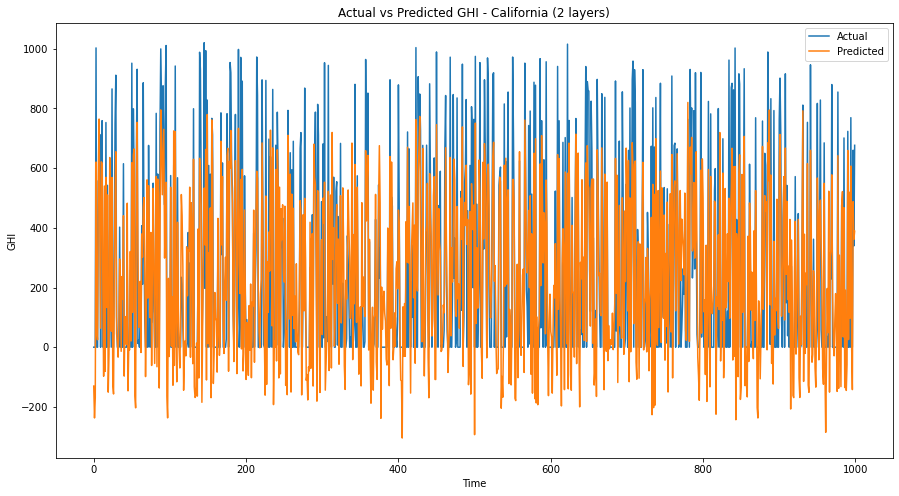

In [264]:
plt.figure(figsize=(15,8))
plotPredictions(X_test_c, y_test_c, y_pred_c1, start=0, end=1000)

### 3 layers

In [378]:
# Create a sequential model

model_c2 = Sequential()

In [379]:
# add layer to the model

num_features = 10 # number of features / columns including the date column converted to Unix timestamp

# Add the first layer (input layer): input layer 
model_c2.add(Dense(units=64, activation='relu', input_dim=num_features))

# Add the second layer (hidden layer): hidden layer 
model_c2.add(Dense(units=4, activation='relu'))

# Add the third layer (output layer): output layer 
model_c2.add(Dense(units=1, activation='linear'))  



### Different scenarios tested:


Units=64, 4, 1 & epochs=5

Train Mean Squared Error for California (3 layers) :  48681.19
Mean Squared Error for California (3 layers) :  47998.91
Root Mean Squared Error (RMSE) for California model (3 layers): 219.09
r2 score or California (3 layers):  0.54

Units=64, 4, 1 & epochs=10

Train Mean Squared Error for California (3 layers) :  37209.72
Mean Squared Error for California (3 layers) :  37377.56
Root Mean Squared Error (RMSE) for California model (3 layers): 193.33
r2 score or California (3 layers):  0.64

Units=64, 2, 1 & epochs=10

Train Mean Squared Error for California (3 layers) :  170554.28
Mean Squared Error for California (3 layers) :  170386.28
Root Mean Squared Error (RMSE) for California model (3 layers): 412.78
r2 score or California (3 layers):  -0.62

Units=64, 2, 1 & epochs=20

Train Mean Squared Error for California (3 layers) :  142672.98
Mean Squared Error for California (3 layers) :  142410.12
Root Mean Squared Error (RMSE) for California model (3 layers): 377.37
r2 score or California (3 layers):  -0.36


### Best One: 

Units=64, 4, 1 & epochs=20

Train Mean Squared Error for California (3 layers) :  35290.72
Mean Squared Error for California (3 layers) :  35539.16
Root Mean Squared Error (RMSE) for California model (3 layers): 188.52
r2 score or California (3 layers):  0.66




In [380]:
# Compile the model: Choose an optimizer, loss function, and metrics


model_c2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


In [384]:
# Train the Model 

history_c2 = model_c2.fit(X_train_c, y_train_c, epochs=20, batch_size=1000, validation_data=(X_test_c, y_test_c))



Epoch 1/20
121/121 [==============================] - 1s 7ms/step - loss: 55337.3672 - mse: 55337.3672 - val_loss: 53251.4570 - val_mse: 53251.4570
Epoch 2/20
121/121 [==============================] - 1s 7ms/step - loss: 53046.0117 - mse: 53046.0117 - val_loss: 51159.3555 - val_mse: 51159.3555
Epoch 3/20
121/121 [==============================] - 1s 6ms/step - loss: 50408.5469 - mse: 50408.5469 - val_loss: 48079.2969 - val_mse: 48079.2969
Epoch 4/20
121/121 [==============================] - 1s 6ms/step - loss: 48209.7344 - mse: 48209.7344 - val_loss: 46634.3398 - val_mse: 46634.3398
Epoch 5/20
121/121 [==============================] - 1s 6ms/step - loss: 46357.2852 - mse: 46357.2852 - val_loss: 44618.5664 - val_mse: 44618.5664
Epoch 6/20
121/121 [==============================] - 1s 6ms/step - loss: 44564.9453 - mse: 44564.9453 - val_loss: 43295.3594 - val_mse: 43295.3594
Epoch 7/20
121/121 [==============================] - 1s 6ms/step - loss: 42539.8672 - mse: 42539.8672 - val_los

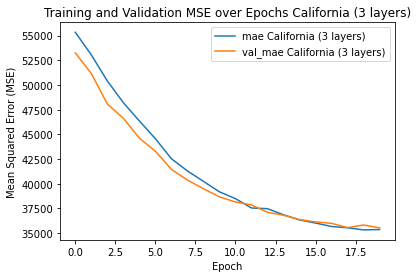

In [385]:
#plot the mse and validation mse of the dataset
plt.plot(history_c2.history['mse'], label='mae California (3 layers)')
plt.plot(history_c2.history['val_mse'], label='val_mae California (3 layers)')

# Set plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation MSE over Epochs California (3 layers)')

plt.legend()

# Show the plot
plt.show()


In [386]:
scores_c2_train = model_c2.evaluate(X_train_c, y_train_c, verbose = 0)
scores_c2 = model_c2.evaluate(X_test_c, y_test_c, verbose = 0)

# Make predictions on the test set
y_pred_c2 = model_c2.predict(X_test_c).flatten()

# Evaluate the model using mean squared error
mse_c2 = mean_squared_error(y_test_c, y_pred_c2)
rmse_c2 = round(np.sqrt(mse_c2),2)

print('Train Mean Squared Error for California (3 layers) : ', round(scores_c2_train[1],2))
print('Mean Squared Error for California (3 layers) : ', round(scores_c2[1],2))

print(f"Root Mean Squared Error (RMSE) for California model (3 layers): {rmse_c2}")
print('r2 score or California (3 layers): ', round(r2_score(y_test_c, y_pred_c2),2))

1610/1610 [==============================] - 2s 1ms/step
Train Mean Squared Error for California (3 layers) :  35290.72
Mean Squared Error for California (3 layers) :  35539.16
Root Mean Squared Error (RMSE) for California model (3 layers): 188.52
r2 score or California (3 layers):  0.66


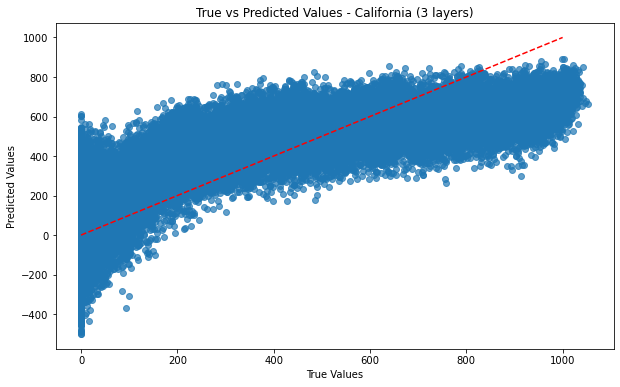

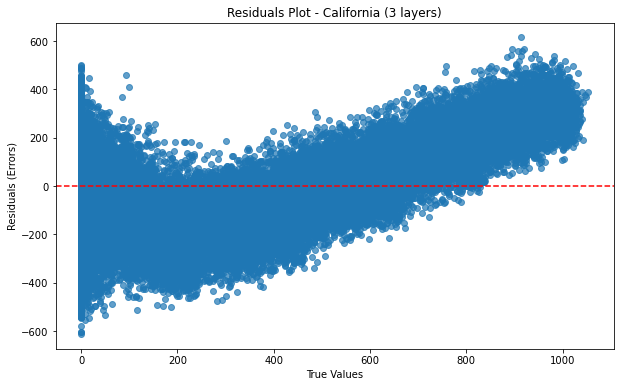

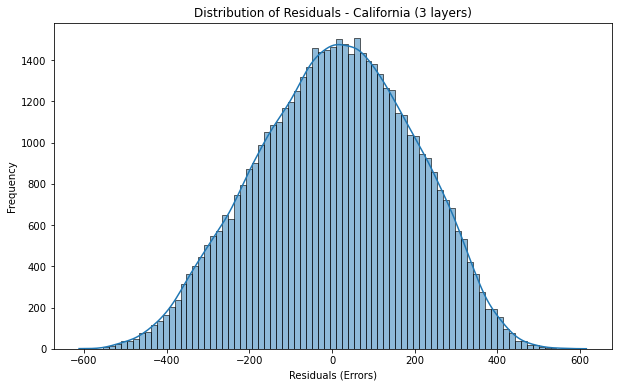

In [387]:

# Scatter plot of true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_c, y_pred_c2, alpha=0.7)
plt.title('True vs Predicted Values - California (3 layers)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
x = np.linspace(0,1000,10000)
y = x
plt.plot(x, y, color='r', linestyle='--')  # Add a diagonal line at y=x for reference
plt.show()

# Plotting the residuals (errors)
residuals_c2 = y_test_c['ALLSKY_SFC_SW_DWN'].values - y_pred_c2

plt.figure(figsize=(10, 6))
plt.scatter(y_test_c, residuals_c2, alpha=0.7)
plt.title('Residuals Plot - California (3 layers)')
plt.xlabel('True Values')
plt.ylabel('Residuals (Errors)')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

# Distribution of errors
plt.figure(figsize=(10, 6))
sns.histplot(residuals_c2, kde=True)
plt.title('Distribution of Residuals - California (3 layers)')
plt.xlabel('Residuals (Errors)')
plt.ylabel('Frequency')
plt.show()

In [388]:
round(r2_score(y_test_c, y_pred_c2),2)


0.66

MSE 35539.17
R2 0.66


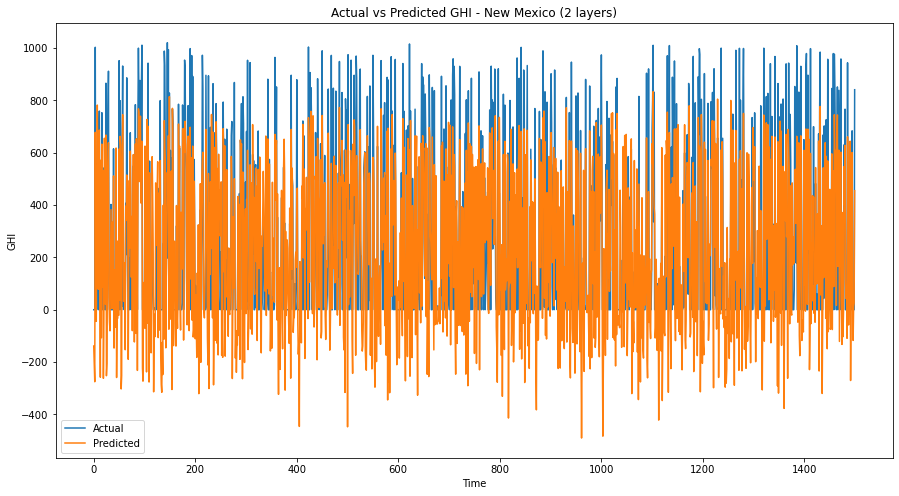

In [389]:
plt.figure(figsize=(15,8))
plotPredictions(X_test_c, y_test_c, y_pred_c2, start=0, end=1500)

## Create and train a Neural Network model with Keras for the New Mexico location

### 2 layers

In [353]:
# Create a sequential model

model_n1 = Sequential()

In [354]:
## try a 2 layer model first 

num_features = 10 # number of features / columns including the date column converted to Unix timestamp

# Add the first layer (input layer): input layer 
model_n1.add(Dense(units=64, activation='relu', input_dim=num_features))

# Add the third layer (output layer): output layer 
model_n1.add(Dense(units=1, activation='linear'))  

### Different scenarios tested of 2 layer model with key results:


###  options I tested:

units=64,units=1 
epochs=10

Train MSE for New Mexico (2 layers) :  70198.23
Test MSE for New Mexico (2 layers) :  70021.27
Root Mean Squared Error (RMSE) for New Mexico (2 layers): 264.62
r2 score or New Mexico (2 layers):  0.32

units=64,units=1 
epochs=20

Train MSE for New Mexico (2 layers) :  30336.37
Test MSE for New Mexico (2 layers) :  30138.53
Root Mean Squared Error (RMSE) for New Mexico (2 layers): 173.6
r2 score or New Mexico (2 layers):  0.70


units=64,units=1 
epochs=50

Train MSE for New Mexico (2 layers) :  29710.08
Test MSE for New Mexico (2 layers) :  29473.33
Root Mean Squared Error (RMSE) for New Mexico (2 layers): 171.68
r2 score or New Mexico (2 layers):  0.70


units=32,units=1 
epochs=10

Train MSE for New Mexico (2 layers) :  84811.77
Test MSE for New Mexico (2 layers) :  84432.08
Root Mean Squared Error (RMSE) for New Mexico (2 layers): 290.57
r2 score or New Mexico (2 layers):  0.18


units=48,units=1 
epochs=10

Train MSE for New Mexico (2 layers) :  8330184.5
Test MSE for New Mexico (2 layers) :  8328243.0
Root Mean Squared Error (RMSE) for New Mexico (2 layers): 2885.87
r2 score or New Mexico (2 layers):  -79.93

units=48,units=1 
epochs=20

Train MSE for New Mexico (2 layers) :  641425.81
Test MSE for New Mexico (2 layers) :  640324.5
Root Mean Squared Error (RMSE) for New Mexico (2 layers): 800.2
r2 score or New Mexico (2 layers):  -5.22

units=76,units=1 
epochs=20

Train MSE for New Mexico (2 layers) :  54692068.0
Test MSE for New Mexico (2 layers) :  54706264.0
Root Mean Squared Error (RMSE) for New Mexico (2 layers): 7396.37
r2 score or New Mexico (2 layers):  -530.61

units=52,units=1 
epochs=20

Train MSE for New Mexico (2 layers) :  89054.55
Test MSE for New Mexico (2 layers) :  88761.57
Root Mean Squared Error (RMSE) for New Mexico (2 layers): 297.93
r2 score or New Mexico (2 layers):  0.14


### BEST ONE:

units=64,units=1 
epochs=30

Train MSE for New Mexico (2 layers) :  30397.05
Test MSE for New Mexico (2 layers) :  30197.81
Root Mean Squared Error (RMSE) for New Mexico (2 layers): 173.78
r2 score or New Mexico (2 layers):  0.71


In [355]:
# Compile the model: Choose an optimizer, loss function, and metrics

model_n1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


In [356]:
# Train the Model 

history_n1 = model_n1.fit(X_train_n, y_train_n, epochs=30, batch_size=1000, validation_data=(X_test_n, y_test_n))



Epoch 1/30
121/121 [==============================] - 1s 7ms/step - loss: 160627.6406 - mse: 160627.6406 - val_loss: 158899.6719 - val_mse: 158899.6719
Epoch 2/30
121/121 [==============================] - 1s 6ms/step - loss: 156546.7812 - mse: 156546.7812 - val_loss: 153660.8906 - val_mse: 153660.8906
Epoch 3/30
121/121 [==============================] - 1s 6ms/step - loss: 150295.9844 - mse: 150295.9844 - val_loss: 146367.1094 - val_mse: 146367.1094
Epoch 4/30
121/121 [==============================] - 1s 8ms/step - loss: 142102.2500 - mse: 142102.2500 - val_loss: 137381.5625 - val_mse: 137381.5625
Epoch 5/30
121/121 [==============================] - 1s 7ms/step - loss: 132606.4844 - mse: 132606.4844 - val_loss: 127382.0000 - val_mse: 127382.0000
Epoch 6/30
121/121 [==============================] - 1s 6ms/step - loss: 122296.3672 - mse: 122296.3672 - val_loss: 116762.2500 - val_mse: 116762.2500
Epoch 7/30
121/121 [==============================] - 1s 6ms/step - loss: 111506.5391 - 

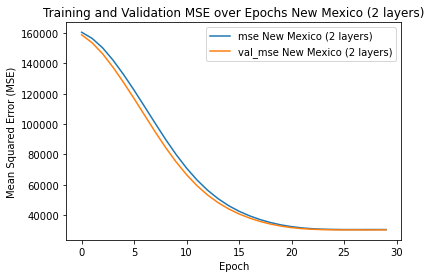

In [357]:
# plot the mse and validation mse of the dataset
plt.plot(history_n1.history['mse'], label='mse New Mexico (2 layers)')
plt.plot(history_n1.history['val_mse'], label='val_mse New Mexico (2 layers)')

# Set plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation MSE over Epochs New Mexico (2 layers)')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [358]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

scores_n1_train = model_n1.evaluate(X_train_n, y_train_n, verbose = 0)
scores_n1 = model_n1.evaluate(X_test_n, y_test_n, verbose = 0)

# Make predictions on the test set
y_pred_n1 = model_n1.predict(X_test_n).flatten()

# Evaluate the model using mean squared error
mse_n1 = mean_squared_error(y_test_n, y_pred_n1)
rmse_n1 = round(np.sqrt(mse_n1),2)


print('Train MSE for New Mexico (2 layers) : ', round(scores_n1_train[1],2))
print('Test MSE for New Mexico (2 layers) : ', round(scores_n1[1],2))

print(f"Root Mean Squared Error (RMSE) for New Mexico (2 layers): {rmse_n1}")
print('r2 score or New Mexico (2 layers): ', round(r2_score(y_test_n, y_pred_n1),2))


1610/1610 [==============================] - 2s 1ms/step
Train MSE for New Mexico (2 layers) :  30397.05
Test MSE for New Mexico (2 layers) :  30197.81
Root Mean Squared Error (RMSE) for New Mexico (2 layers): 173.78
r2 score or New Mexico (2 layers):  0.71


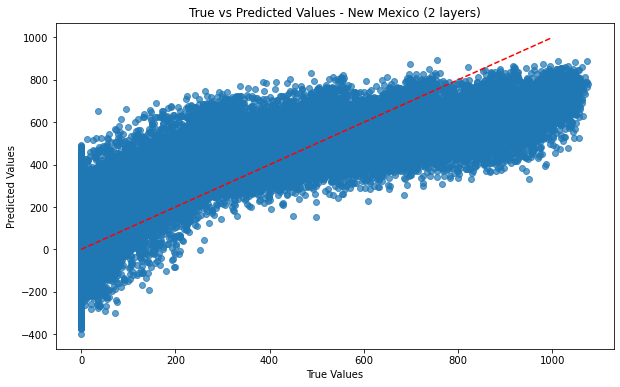

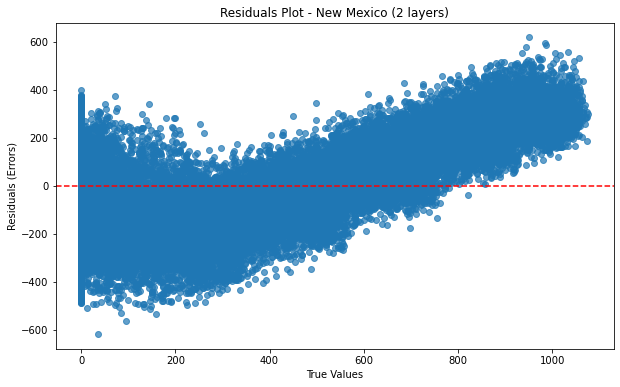

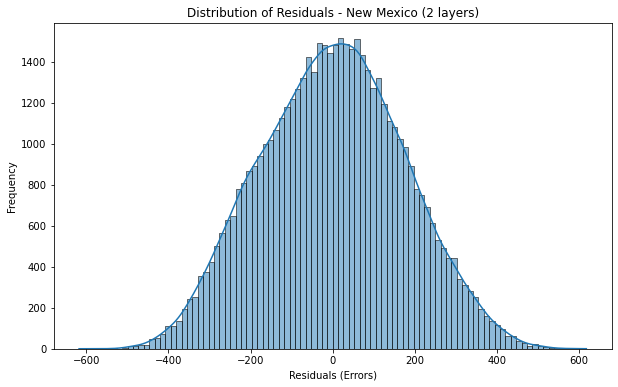

In [359]:

# Scatter plot of true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_n, y_pred_n1, alpha=0.7)
plt.title('True vs Predicted Values - New Mexico (2 layers)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
x = np.linspace(0,1000,10000)
y = x
plt.plot(x, y, color='r', linestyle='--')  # Add a diagonal line at y=x for reference
plt.show()

# Plotting the residuals (errors)
residuals_n1 = y_test_n['ALLSKY_SFC_SW_DWN'].values - y_pred_n1

plt.figure(figsize=(10, 6))
plt.scatter(y_test_n, residuals_n1, alpha=0.7)
plt.title('Residuals Plot - New Mexico (2 layers)')
plt.xlabel('True Values')
plt.ylabel('Residuals (Errors)')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

# Distribution of errors
plt.figure(figsize=(10, 6))
sns.histplot(residuals_n1, kde=True)
plt.title('Distribution of Residuals - New Mexico (2 layers)')
plt.xlabel('Residuals (Errors)')
plt.ylabel('Frequency')
plt.show()


In [360]:
def plotPredictions(X, y, y_pred, start=0, end=1000):
    y_pred = np.hstack(y_pred)
    plt.plot(y[start:end], label='Actual')
    plt.plot(y_pred[start:end], label='Predicted')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('GHI')
    plt.title('Actual vs Predicted GHI - New Mexico (2 layers)')
    print(f'MSE {mean_squared_error(y, y_pred):.2f}')
    print(f'R2 {r2_score(y, y_pred):.2f}') 
    
# See if I can change when the graph starts for y_pred, try changing np.hstack(y_pred) !!!!!!!!!!!!!!
    

In [361]:
round(r2_score(y_test_n, y_pred_n1),2)

0.71

MSE 30197.79
R2 0.71


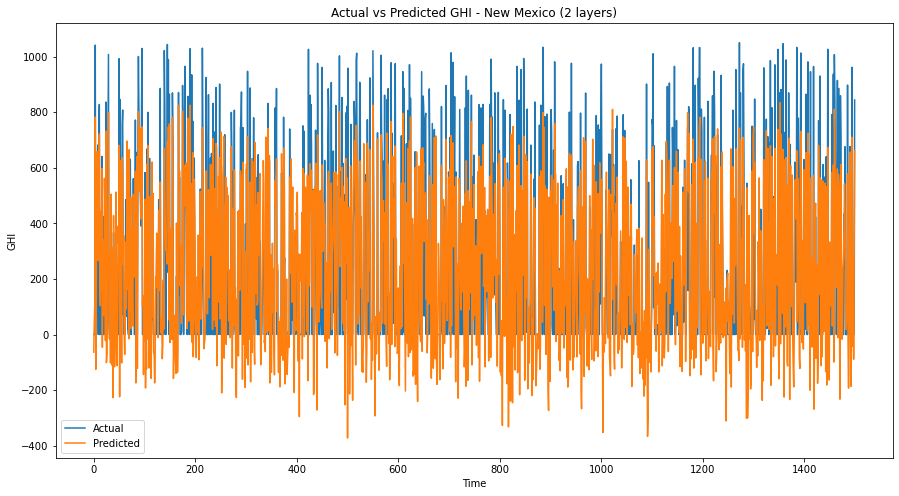

In [366]:
plt.figure(figsize=(15,8))
plotPredictions(X_test_n, y_test_n, y_pred_n1, start=0, end=1500)

### 3 layers

In [400]:
# Create a sequential model

model_n2 = Sequential()

In [401]:
# add layer to the model

num_features = 10 # number of features / columns including the date column converted to Unix timestamp

# Add the first layer (input layer): input layer 
model_n2.add(Dense(units=64, activation='relu', input_dim=num_features))

# Add the second layer (hidden layer): hidden layer 
model_n2.add(Dense(units=4, activation='relu'))

# Add the third layer (output layer): output layer 
model_n2.add(Dense(units=1, activation='linear'))  



### Different scenarios tested:


Units=64, 4, 1 & epochs=5

Train Mean Squared Error for New Mexico (3 layers) :  67743.12
Mean Squared Error for New Mexico (3 layers) :  68415.33
Root Mean Squared Error (RMSE) for New Mexico model (3 layers): 261.56
r2 score or New Mexico (3 layers):  0.34

Units=64, 4, 1 & epochs=10

Train Mean Squared Error for New Mexico (3 layers) :  55153.5
Mean Squared Error for New Mexico (3 layers) :  54960.79
Root Mean Squared Error (RMSE) for New Mexico model (3 layers): 234.44
r2 score or New Mexico (3 layers):  0.47

Units=64, 2, 1 & epochs=10

Train Mean Squared Error for New Mexico (3 layers) :  62594.71
Mean Squared Error for New Mexico (3 layers) :  62342.03
Root Mean Squared Error (RMSE) for New Mexico model (3 layers): 249.68
r2 score or New Mexico (3 layers):  0.39

Units=64, 2, 1 & epochs=20

Train Mean Squared Error for New Mexico (3 layers) :  61500.95
Mean Squared Error for New Mexico (3 layers) :  61260.67
Root Mean Squared Error (RMSE) for New Mexico model (3 layers): 247.51
r2 score or New Mexico (3 layers):  0.4


### Best One: 

Units=64, 4, 1 & epochs=20

Train Mean Squared Error for New Mexico (3 layers) :  31488.28
Mean Squared Error for New Mexico (3 layers) :  31327.87
Root Mean Squared Error (RMSE) for New Mexico model (3 layers): 177.0
r2 score or New Mexico (3 layers):  0.7




In [415]:
# Compile the model: Choose an optimizer, loss function, and metrics


model_n2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


In [416]:
# Train the Model 

history_n2 = model_n2.fit(X_train_n, y_train_n, epochs=20, batch_size=1000, validation_data=(X_test_n, y_test_n))



Epoch 1/20
121/121 [==============================] - 1s 8ms/step - loss: 41583.6953 - mse: 41583.6953 - val_loss: 40280.8164 - val_mse: 40280.8164
Epoch 2/20
121/121 [==============================] - 1s 7ms/step - loss: 39320.3594 - mse: 39320.3594 - val_loss: 38079.8867 - val_mse: 38079.8867
Epoch 3/20
121/121 [==============================] - 1s 6ms/step - loss: 37193.2500 - mse: 37193.2500 - val_loss: 36145.6523 - val_mse: 36145.6523
Epoch 4/20
121/121 [==============================] - 1s 7ms/step - loss: 35361.8945 - mse: 35361.8945 - val_loss: 34299.6406 - val_mse: 34299.6406
Epoch 5/20
121/121 [==============================] - 1s 8ms/step - loss: 33861.1758 - mse: 33861.1758 - val_loss: 33164.1133 - val_mse: 33164.1133
Epoch 6/20
121/121 [==============================] - 1s 9ms/step - loss: 32821.3828 - mse: 32821.3828 - val_loss: 32123.0391 - val_mse: 32123.0391
Epoch 7/20
121/121 [==============================] - 1s 6ms/step - loss: 32113.4727 - mse: 32113.4727 - val_los

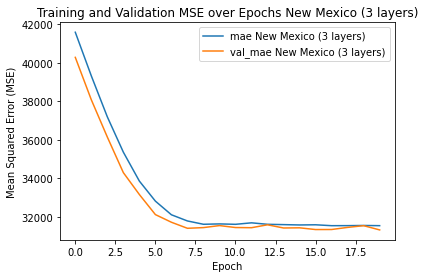

In [417]:
#plot the mse and validation mse of the dataset
plt.plot(history_n2.history['mse'], label='mae New Mexico (3 layers)')
plt.plot(history_n2.history['val_mse'], label='val_mae New Mexico (3 layers)')

# Set plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation MSE over Epochs New Mexico (3 layers)')

plt.legend()

# Show the plot
plt.show()


In [418]:
scores_n2_train = model_n2.evaluate(X_train_n, y_train_n, verbose = 0)
scores_n2 = model_n2.evaluate(X_test_n, y_test_n, verbose = 0)

# Make predictions on the test set
y_pred_n2 = model_n2.predict(X_test_n).flatten()

# Evaluate the model using mean squared error
mse_n2 = mean_squared_error(y_test_n, y_pred_n2)
rmse_n2 = round(np.sqrt(mse_n2),2)

print('Train Mean Squared Error for New Mexico (3 layers) : ', round(scores_n2_train[1],2))
print('Mean Squared Error for New Mexico (3 layers) : ', round(scores_n2[1],2))

print(f"Root Mean Squared Error (RMSE) for New Mexico model (3 layers): {rmse_n2}")
print('r2 score or New Mexico (3 layers): ', round(r2_score(y_test_n, y_pred_n2),2))

1610/1610 [==============================] - 2s 1ms/step
Train Mean Squared Error for New Mexico (3 layers) :  31488.28
Mean Squared Error for New Mexico (3 layers) :  31327.87
Root Mean Squared Error (RMSE) for New Mexico model (3 layers): 177.0
r2 score or New Mexico (3 layers):  0.7


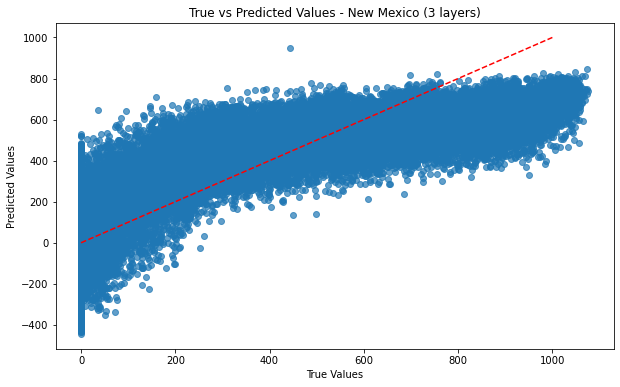

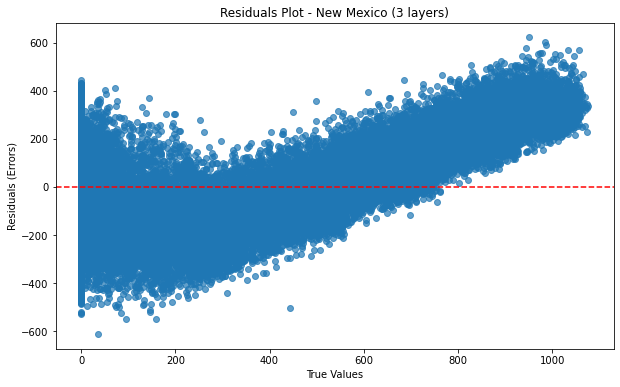

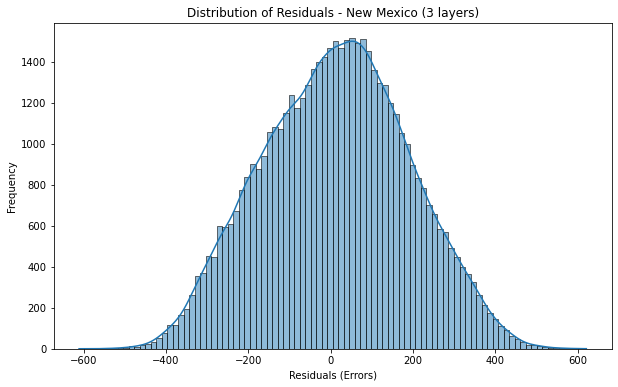

In [419]:

# Scatter plot of true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_n, y_pred_n2, alpha=0.7)
plt.title('True vs Predicted Values - New Mexico (3 layers)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
x = np.linspace(0,1000,10000)
y = x
plt.plot(x, y, color='r', linestyle='--')  # Add a diagonal line at y=x for reference
plt.show()

# Plotting the residuals (errors)
residuals_n2 = y_test_n['ALLSKY_SFC_SW_DWN'].values - y_pred_n2

plt.figure(figsize=(10, 6))
plt.scatter(y_test_n, residuals_n2, alpha=0.7)
plt.title('Residuals Plot - New Mexico (3 layers)')
plt.xlabel('True Values')
plt.ylabel('Residuals (Errors)')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

# Distribution of errors
plt.figure(figsize=(10, 6))
sns.histplot(residuals_n2, kde=True)
plt.title('Distribution of Residuals - New Mexico (3 layers)')
plt.xlabel('Residuals (Errors)')
plt.ylabel('Frequency')
plt.show()

In [420]:
round(r2_score(y_test_n, y_pred_n2),2)


0.7

MSE 31327.89
R2 0.70


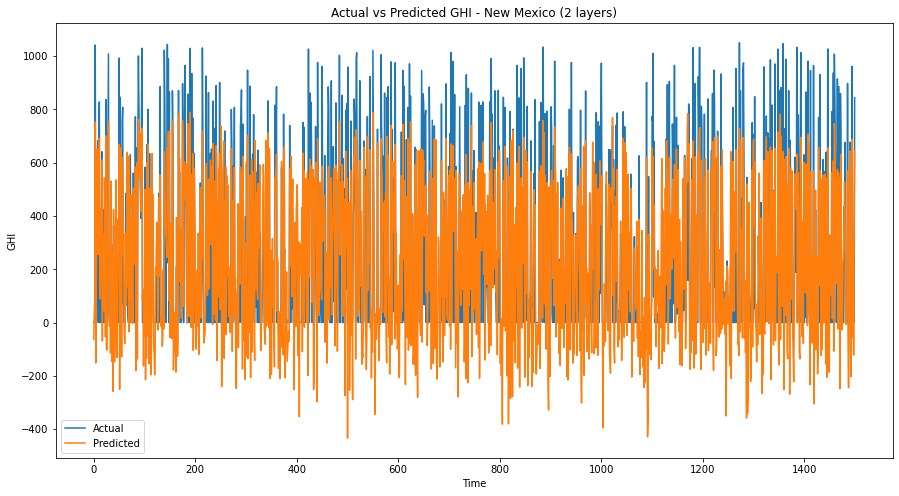

In [421]:
plt.figure(figsize=(15,8))
plotPredictions(X_test_n, y_test_n, y_pred_n2, start=0, end=1500)

# Comparing all results for the 3 different locations:

# Arizona

## 2 layer

#### Details of the options used in the Dense model within Keras package

units=64,units=1 
& epochs=10

In [422]:
print('Train MSE for Arizona (2 layers) : ', round(scores_a1_train[1],2))
print('Test MSE for Arizona (2 layers) : ', round(scores_a1[1],2))

print(f"Root Mean Squared Error (RMSE) for Arizona (2 layers): {rmse_a1}")
print('r2 score or Arizona (2 layers): ', round(r2_score(y_test_a, y_pred_a1),2))


Train MSE for Arizona (2 layers) :  31766.3
Test MSE for Arizona (2 layers) :  31935.11
Root Mean Squared Error (RMSE) for Arizona (2 layers): 178.7
r2 score or Arizona (2 layers):  0.7


### 3 layer

#### Details of the options used in the Dense model within Keras package

Units=64, 4, 1 
& epochs=20

In [430]:
print('Train MSE for Arizona (3 layers) : ', round(scores_a2_train[1],2))
print('Test MSE for Arizona (3 layers) : ', round(scores_a2[1],2))

print(f"Root Mean Squared Error (RMSE) for Arizona (3 layers): {rmse_a2}")
print('r2 score or Arizona (3 layers): ', round(r2_score(y_test_a, y_pred_a2),2))


Train MSE for Arizona (3 layers) :  32673.16
Test MSE for Arizona (3 layers) :  32921.79
Root Mean Squared Error (RMSE) for Arizona (3 layers): 181.44
r2 score or Arizona (3 layers):  0.69


# California

## 2 layer

#### Details of the options used in the Dense model within Keras package

units=64,units=1 
& epochs=30

In [426]:
print('Train MSE for California (2 layers) : ', round(scores_c1_train[1],2))
print('Test MSE for California (2 layers) : ', round(scores_c1[1],2))

print(f"Root Mean Squared Error (RMSE) for California (2 layers): {rmse_c1}")
print('r2 score or California (2 layers): ', round(r2_score(y_test_c, y_pred_c1),2))


Train MSE for California (2 layers) :  30612.33
Test MSE for California (2 layers) :  30797.69
Root Mean Squared Error (RMSE) for California (2 layers): 175.49
r2 score or California (2 layers):  0.71


### 3 layer

#### Details of the options used in the Dense model within Keras package

Units=64, 4, 1 
& epochs=20

In [432]:
print('Train MSE for California (3 layers) : ', round(scores_c2_train[1],2))
print('Test MSE for California (3 layers) : ', round(scores_c2[1],2))

print(f"Root Mean Squared Error (RMSE) for California (3 layers): {rmse_c2}")
print('r2 score or California (3 layers): ', round(r2_score(y_test_c, y_pred_c2),2))


Train MSE for California (3 layers) :  35290.72
Test MSE for California (3 layers) :  35539.16
Root Mean Squared Error (RMSE) for California (3 layers): 188.52
r2 score or California (3 layers):  0.66


# New Mexico

## 2 layer

#### Details of the options used in the Dense model within Keras package

units=64,units=1 
& epochs=30

In [433]:
print('Train MSE for New Mexico (2 layers) : ', round(scores_n1_train[1],2))
print('Test MSE for New Mexico (2 layers) : ', round(scores_n1[1],2))

print(f"Root Mean Squared Error (RMSE) for New Mexico (2 layers): {rmse_n1}")
print('r2 score or New Mexico (2 layers): ', round(r2_score(y_test_n, y_pred_n1),2))


Train MSE for New Mexico (2 layers) :  30397.05
Test MSE for New Mexico (2 layers) :  30197.81
Root Mean Squared Error (RMSE) for New Mexico (2 layers): 173.78
r2 score or New Mexico (2 layers):  0.71


### 3 layer

#### Details of the options used in the Dense model within Keras package

Units=64, 4, 1 
& epochs=20

In [434]:
print('Train MSE for New Mexico (3 layers) : ', round(scores_n2_train[1],2))
print('Test MSE for New Mexico (3 layers) : ', round(scores_n2[1],2))

print(f"Root Mean Squared Error (RMSE) for New Mexico (3 layers): {rmse_n2}")
print('r2 score for New Mexico (3 layers): ', round(r2_score(y_test_n, y_pred_n2),2))


Train MSE for New Mexico (3 layers) :  31488.28
Test MSE for New Mexico (3 layers) :  31327.87
Root Mean Squared Error (RMSE) for New Mexico (3 layers): 177.0
r2 score or New Mexico (3 layers):  0.7


# Evaluating all models trained

The 2 layer models for all three locations gave very similar results with r squared ranging from 0.70 and 0.71 and RMSE 173.78 to 178.7. New Mexico having the lowest RMSE in both the 2 layer models and the 3 layer models. However, overall, the 2 layer models worked best for this data. A 0.71 for r squared for this hourly data with a high volatility as observed in the charts comparing the predicted and actual values. 

The best model for predicting the GHI with weather conditions for a new location was the neural network model of 2 layers of New Mexico taking into account the MSE and R2. 

Although this model had the best performance, I wanted to do a quick comparison to a simplier, less complex model as the linear multivariate model. The results below were interesting that the linear model had a slightly better result on one try compared to the neural network model that is more complex and takes longer to train. Although the result is interesting, these results were probably expected since it was a regression problem. I think the neural network model could perform better as we get more data.

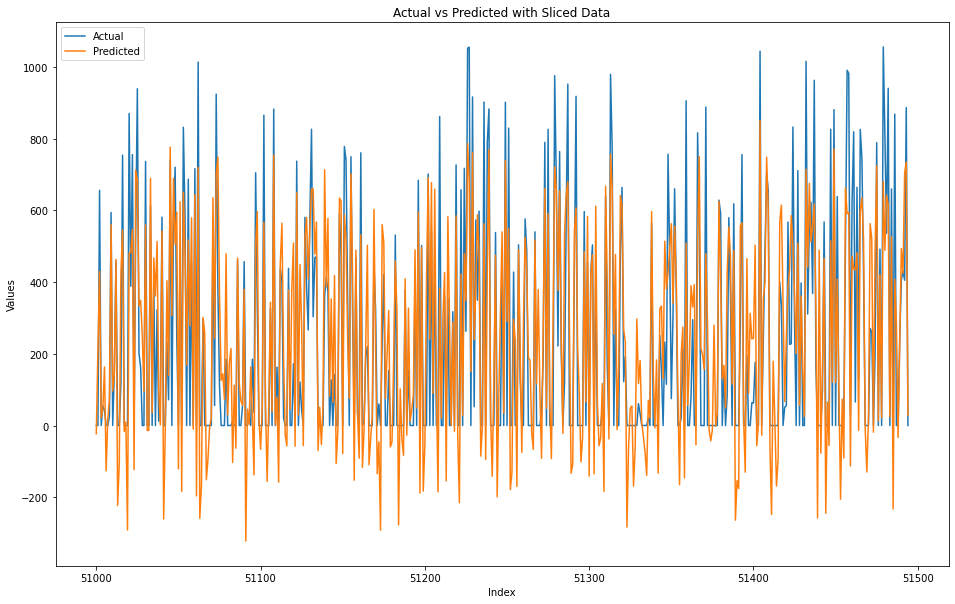

In [461]:
# Set the start and end points for display
start_point = 51000
end_point = 51500  

# Generate a time array based on the length of your data
time_array = np.arange(len(y_test_n))

# Plot actual vs predicted with sliced data
plt.figure(figsize=(16, 10))


# Slice the actual values and corresponding time points
plt.plot(time_array[start_point:end_point], y_test_n[start_point:end_point], label='Actual')#, marker='o')

# Slice the predicted values with the same indices
plt.plot(time_array[start_point:end_point], y_pred_n1[start_point:end_point], label='Predicted')#, marker='o')


plt.title('Actual vs Predicted with Sliced Data')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()


In [466]:
# Create and train the linear multivariate regression model to compare to 
# the results of the neural network models above

from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train_n, y_train_n)

# Make predictions on the test set
y_pred_n_linear = model_linear.predict(X_test_n)

# Evaluate the model
mse_n_linear = round(mean_squared_error(y_test_n, y_pred_n_linear),2)
explained_variance_n_linear = round(explained_variance_score(y_test_n, y_pred_n_linear),2)
print(f'Mean Squared Error: {mse_n_linear}')
print('r2 score: ', round(r2_score(y_test_n, y_pred_n_linear),2))

Mean Squared Error: 27564.24
r2 score:  0.73
